## Model Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

### Sequential API

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10,activation='softmax'))   # number of categories = 10, sigmoid 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 50)                270450    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 271,280
Trainable params: 271,280
Non-trainable params: 0
__________________________________________________

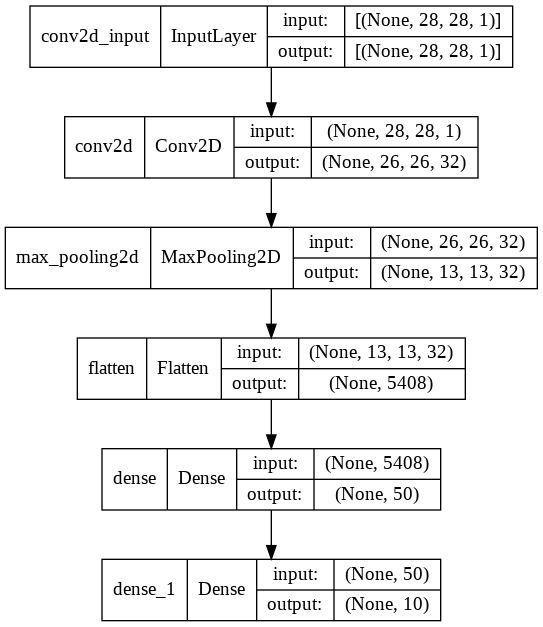

In [3]:
plot_model(model, to_file='m1.png', show_shapes=True, show_layer_names=True)

### Functional API

In [4]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

inp = Input(shape=(28,28,1))
x = Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(50, activation='relu')(x)
out = Dense(10,activation='softmax')(x)

model2 = Model(inputs= inp, outputs= out)

model2.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                270450    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                             

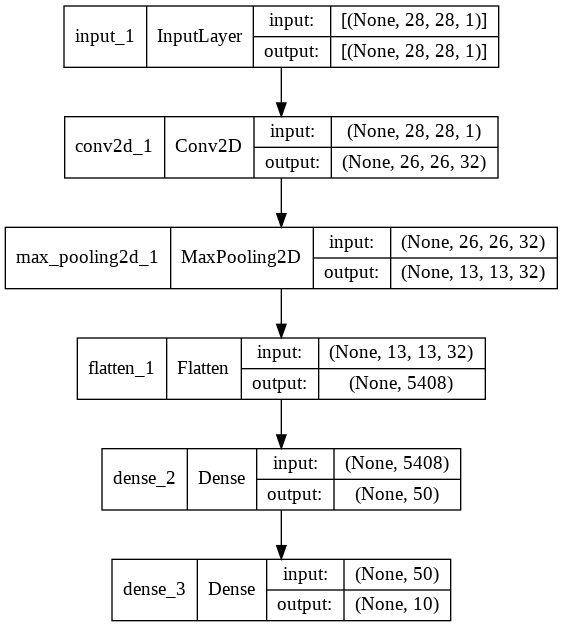

In [5]:
plot_model(model2, to_file='m2.png', show_shapes=True, show_layer_names=True)

### New varient

In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate

inp = Input(shape=(28,28,1))
x1 = Conv2D(32, (3, 3), activation='relu')(inp)
x1 = MaxPooling2D((2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(16, (4, 4), activation='relu')(inp)
x2 = MaxPooling2D((2, 2))(x2)
x2 = Flatten()(x2)

x = Concatenate()([x1, x2])
x = Dense(50, activation='relu')(x)
out = Dense(10,activation='softmax')(x)

model3 = Model(inputs= inp, outputs= out)

model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 25, 25, 16)   272         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_2[0][0]']               
                                                                                            

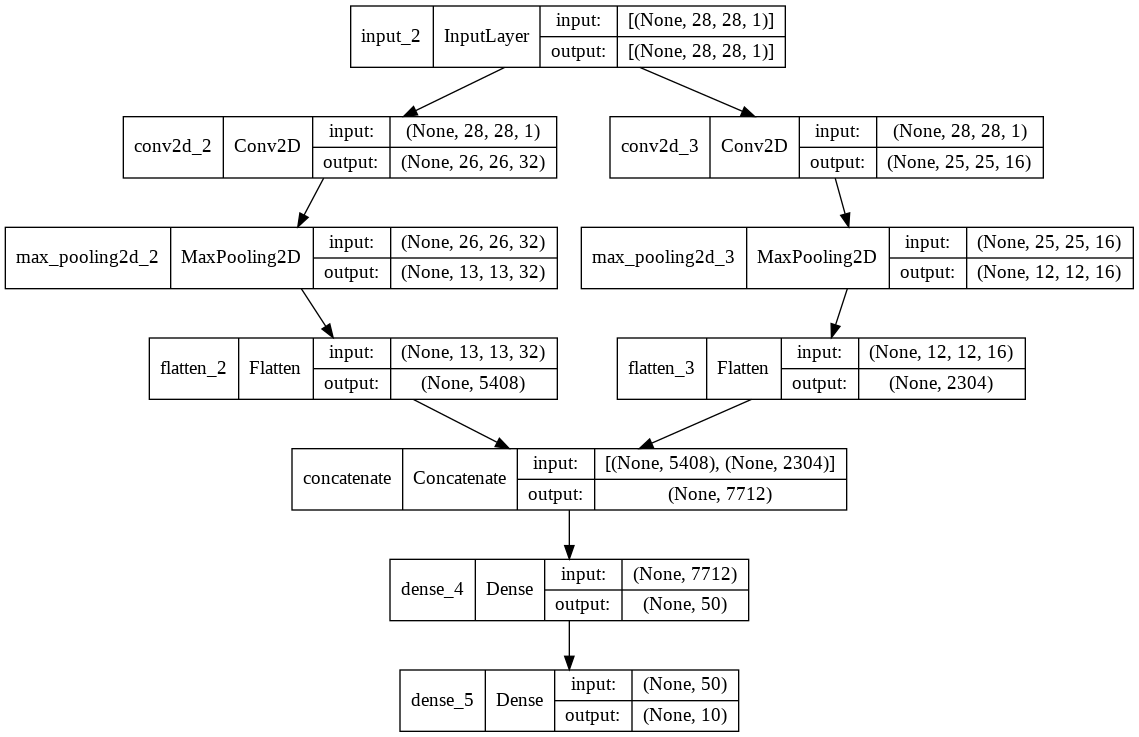

In [7]:
plot_model(model3, to_file='m3.png', show_shapes=True, show_layer_names=True)